# Init

In [7]:
from numpy import *
import matplotlib.pyplot as plt
N = 64
L = 1
dx = h = L/N

# GS.py

converge at 2579 iterations


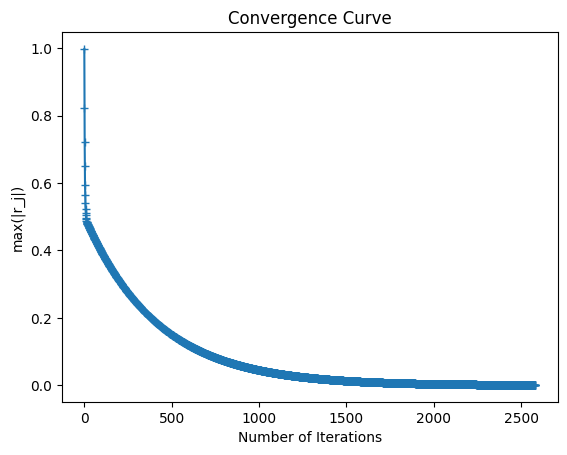

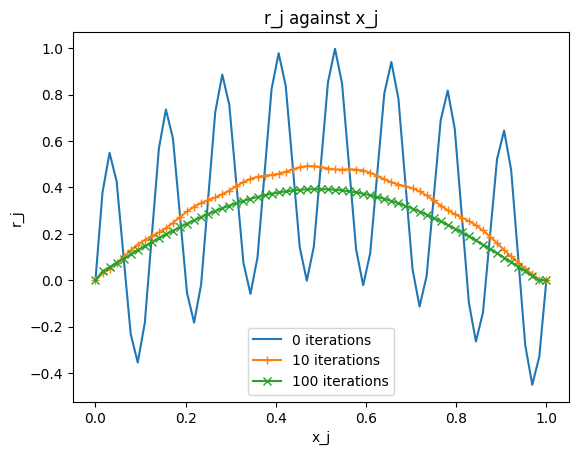

In [8]:
phi = zeros(N+1)
new = zeros(N+1)
tmp = array([sin(pi*i*dx)/2 + sin(16*pi*i*dx)/2 for i in range(1, N)])
r0 = zeros(N+1)
r10 = zeros(N+1)
r100 = zeros(N+1)
r0[1:N] = tmp
resi = [0]
resi[0] = max(abs(tmp))

new = zeros(N+1)
for t in range(0, 10000):
    for j in range(1, N):
        new[j] = (phi[j+1]+new[j-1]-dx**2*tmp[j-1])/2
    new[0] = new[N] = 0
    r = tmp-(new[0:N-1]-2*new[1:N]+new[2:N+1])/dx**2
    resi.append(max(abs(r)))
    phi = new
    if t == 10:
        r10[1:N] = r
    elif t == 100:
        r100[1:N] = r
    if (max(abs(r)) < 0.001):
        print("converge at {} iterations".format(t))
        break


plt.figure()
plt.plot(range(len(resi)), resi, '+-')
plt.xlabel('Number of Iterations')
plt.ylabel('max(|r_j|)')
plt.title('Convergence Curve')

plt.figure()
x = linspace(0, 1, N+1)
plt.plot(x, r0, '-', x, r10, '+-', x, r100, 'x-')
plt.legend(['0 iterations', '10 iterations', '100 iterations'])
plt.xlabel('x_j')
plt.ylabel('r_j')
plt.title('r_j against x_j')
plt.show()

# MG.py

cnt: 0  r_disp: 0.4382978969927721

cnt: 1  r_disp: 0.09256329407590363

cnt: 2  r_disp: 0.013865944380054784

cnt: 3  r_disp: 0.0018035145005387276

cnt: 4  r_disp: 0.0002488370235295967

converge at 40 iterations


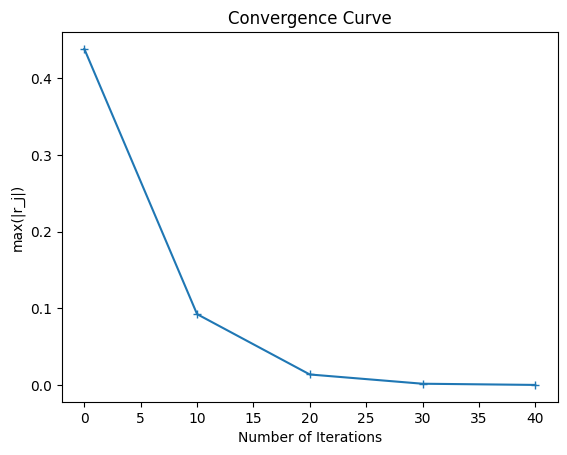

In [9]:
phi = zeros(N+1)
f = array([sin(pi*i*h)/2 + sin(16*pi*i*h)/2 for i in range(0, N+1)])


def smoothing(phi, f, h) -> array:
    N = len(phi)-1
    res = zeros(N+1)
    for j in range(1, N):
        phi[j+1]
        res[j] = (phi[j+1]+res[j-1]-h**2*f[j])/2
    return res


def restriction(r) -> array:
    N = int((len(r)-1)/2)
    res = zeros(N+1)
    for j in range(2, N+1):
        res[j-1] = (r[2*j-3]+2*r[2*j-2]+r[2*j-1])/4
    return res


def prolongation(eps) -> array:
    N = (len(eps)-1)*2
    res = zeros(N+1)
    for j in range(2, N+1, 2):
        res[j-1] = (eps[int(j/2-1)]+eps[int(j/2)])/2
    for j in range(1, N+2, 2):
        res[j-1] = eps[int((j+1)/2-1)]
    return res


def residual(phi, f, h) -> array:
    N = len(phi)-1
    res = zeros(N+1)
    res[1:N] = f[1:N]-(phi[0:N-1]-2*phi[1:N]+phi[2:N+1])/h**2
    return res


def V_Cycle(phi, f, h):
    phi = smoothing(phi, f, h)
    r = residual(phi, f, h)
    rhs = restriction(r)
    eps = zeros(len(rhs))
    if len(eps)-1 == 2:
        eps = smoothing(eps, rhs, 2*h)
    else:
        eps = V_Cycle(eps, rhs, 2*h)
    phi = phi + prolongation(eps)
    phi = smoothing(phi, f, h)
    return phi


resi = []
for cnt in range(0, 1001):
    phi = V_Cycle(phi, f, h)
    r = residual(phi, f, h)

    r_disp = max(abs(r))
    resi.append(r_disp)
    print("cnt: {}  r_disp: {}\n".format(cnt, r_disp))
    if max(abs(r)) < 0.001:
        print("converge at {} iterations".format(cnt*10))
        break

plt.figure()
plt.plot(arange(len(resi))*10, resi, '+-')
plt.xlabel('Number of Iterations')
plt.ylabel('max(|r_j|)')
plt.title('Convergence Curve')
plt.show()